# Introduction

Hello,welcome to my kernel! In this kernel I am going to predict death using heart failure data. In order to prediction I am going to use my logistic regression functions. Let's take a look at the schedule

## Schedule
1. Importing Libraries and The Data
1. Taking a Look at The Data
1. Preparing Dataset
    * Normalization
    * Train Test Split 
1. Defining Functions
    * Sigmoid Function
    * Initializing Function
    * Forward-Backward Function
    * Updating Function
1. Result
1. Conclusion
    

# Importing Libraries and The Data 

In this section I'll add the libraries and the data that I will use. 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

I've imported the libraries. Now I'll add the data.

In [ ]:
data = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

# Taking a Look at The Data

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.info()

# Preparing Dataset


## Normalization

You know, we have to normalize the data because if we do not normalize our data, there will be problems in our model. Let's normalize the data.

In [ ]:
x_data = data.drop("DEATH_EVENT",axis=1) # It is our x axis data (not normalized)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x.head()

## Train - Test Split 

In this section I am going to split x and y into two pieces. Train and Test. With train array, we will train our data and with test array we will test our model. Let's do this!

In [ ]:
# We had created our x array.
y = data["DEATH_EVENT"].values

# There is a good split function in sklearn library
from sklearn.model_selection import train_test_split

x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=42)

print(f"""\tX Train's shape is: {x_train1.shape}
        X Test's shape is {x_test1.shape}
        Y Train's shape is {y_train1.shape}
        Y Test's shape is {y_test1.shape}""")


We created our array but we need to do one more process to our arrays. We need to reverse our arrays by the shape. 


In [ ]:

x_train1 = x_train1.T
x_test1 = x_test1.T
y_train1 = y_train1.T
y_test1 = y_test1.T

print(f"""\tX Train's shape is: {x_train1.shape}
        X Test's shape is {x_test1.shape}
        Y Train's shape is {y_train1.shape}
        Y Test's shape is {y_test1.shape}""")



Our splitting process has finished.


# Defining Functions

In this section I am going to define functions that I will need in logistic regression

## Sigmoid Function

You know, in logistic regression we need a y_head value between 0 and 1, and we use sigmoid function to do this process. We can do this with a library but in this kernel I want to do this with my codes.

Before the coding, Let's taking a look at sigmoid function's mathametical expression

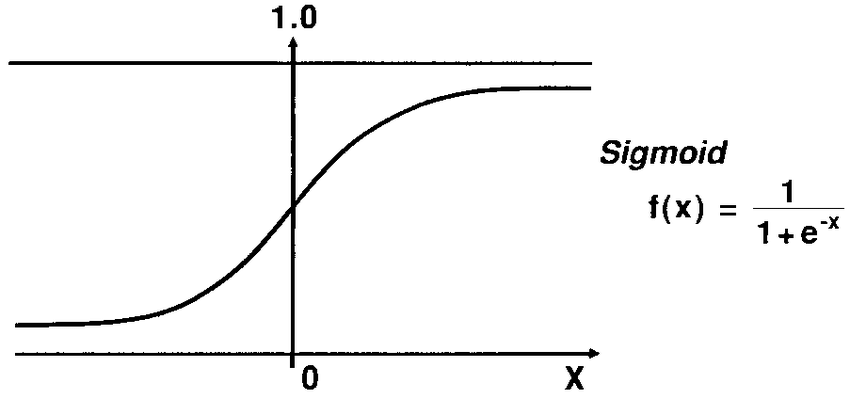

We are ready to convert sigmoid function to code.

In [ ]:
def sigmoid(z):
    
    y_head = 1 / (1 + np.exp(-z))
    return y_head
   
    

## Initializing Function

We need weight values and bias value in logistic regression training. But we do not have any values. For taking initial weight values and bias I am going to define a function

In [ ]:
def initializing(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

## Forward - Backward Propagation Function

There are two sections in Logistic Regression. Forward and Backward propagation. In this section I am going to define a function about them


In [ ]:

def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation:
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -(1 - y_train) * np.log(1 - y_head) - y_train * np.log(y_head)     # loss function formula
    cost = (np.sum(loss)) / x_train.shape[1]                               # cost function formula
    
    # backward propagation:
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    
    gradients = {'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias}
    
    return cost, gradients

## Updating Function

In last function we have given our gradients. And now we are ready to update weight and bias, for this I am going to define a update function

In [ ]:
def update(w, b, x_train, y_train, learning_rate, nu_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(nu_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
    
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        if i % 20 == 0:
            cost_list2.append(cost)
            index.append(i)
            print('Cost after iteration %i: %f' %(i,cost))
    
    parameters = {'weight': w, 'bias':b}
    
    # Visulizatio
    plt.plot(index, cost_list2)
    plt.xlabel('Nu of Iteration')
    plt.ylabel('Cost Function Value')
    plt.show()
    
    return parameters, gradients, cost_list

## Prediction Function

We are ready to create our model, but we can not predict anything because we do not have a prediction function. Therefore I am going to define a prediction function.

In [ ]:
def predict(w,b,x_test):
    
    z = np.dot(w.T,x_test)+b
    y_head = sigmoid(z)
    prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        
        if z[0,i] <= 0.5:
            prediction[0,i] = 0
        else:
            prediction[0,i] = 1
    
    return prediction

# Result

Our functions are ready. We can do logical regression now, but before this we need one more function. Let's write him.

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    dimension =  x_train.shape[0]  
    w,b = initializing(dimension)
    
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    


This function helps us to do logistic regression

In [ ]:
logistic_regression(x_train1, y_train1, x_test1, y_test1,learning_rate = 6, num_iterations = 50)


# Conclusion

My english is not enough for describing everything, so my explanations are not enough I know. However if you want to learn more details, you can examine this kernel. 

https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners

I am waiting for your advices, comments and upvotes.

## Special Thanks

I examined your kernel, thanks!

https://www.kaggle.com/akdagmelih/rain-prediction-logistic-regression-example

